### Base visualizations for presentation:
 
    
I would include in my explanatory analysis the following:
- vis #15 - mean flight speed, as this metric is an essential piece of infomation about flights that was not originally included in the dataset.
- vis #11 - mean ground time, beacause it is a useful metirc in observing how much time of a given flight is actually spent within airports. This data is as well is not given in the dataset, but I find it interesting to present, as it can offer a different perpective to look on each carrier's performance.
- vis #6 - avg. air times by unique carrier, should present on the same dashboard with avg. ground time, in order to show two sides of the flight process.
- vis #4 - yearly flight counts by carrier, and will present it with total yearly delay by carrier, in order to illustrate a potential impact. 
- vis #12 - Distribution of flight distance. This vis combined with the speed visualization could comprehensively describe flight air time metric.
-vis #10 - Airtime vs Distance, would add this to the same dashboard with speed and distribution of distance.

In [8]:
from load import get_years
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, patches
import seaborn as sns
import warnings
from math import floor, ceil
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
def drop_outliers(data, value_col, p=5, category_col=None):
    """Return DataFrame without overflow values."""
    def trunc(frame):  
        top, bottom = np.nanpercentile(a=frame[value_col], q=[100 - p / 2, p / 2])
        return frame[(frame[value_col] >= bottom) & (frame[value_col] <= top)].copy()
    if category_col:
        if data[category_col].dtype != 'category':
            raise TypeError('Category_col dtype should be categorical.')
        objs = [trunc(data[data[category_col] == item]) for item in data[category_col].cat.categories]
        return pd.concat(objs, ignore_index=True)
    else:
        return trunc(data)

In [3]:
df = get_years(year_range=(2000, 2008))
base_color = sns.color_palette()[0]

# Vis 1 - Distribution Of Flight Speed And Distance 

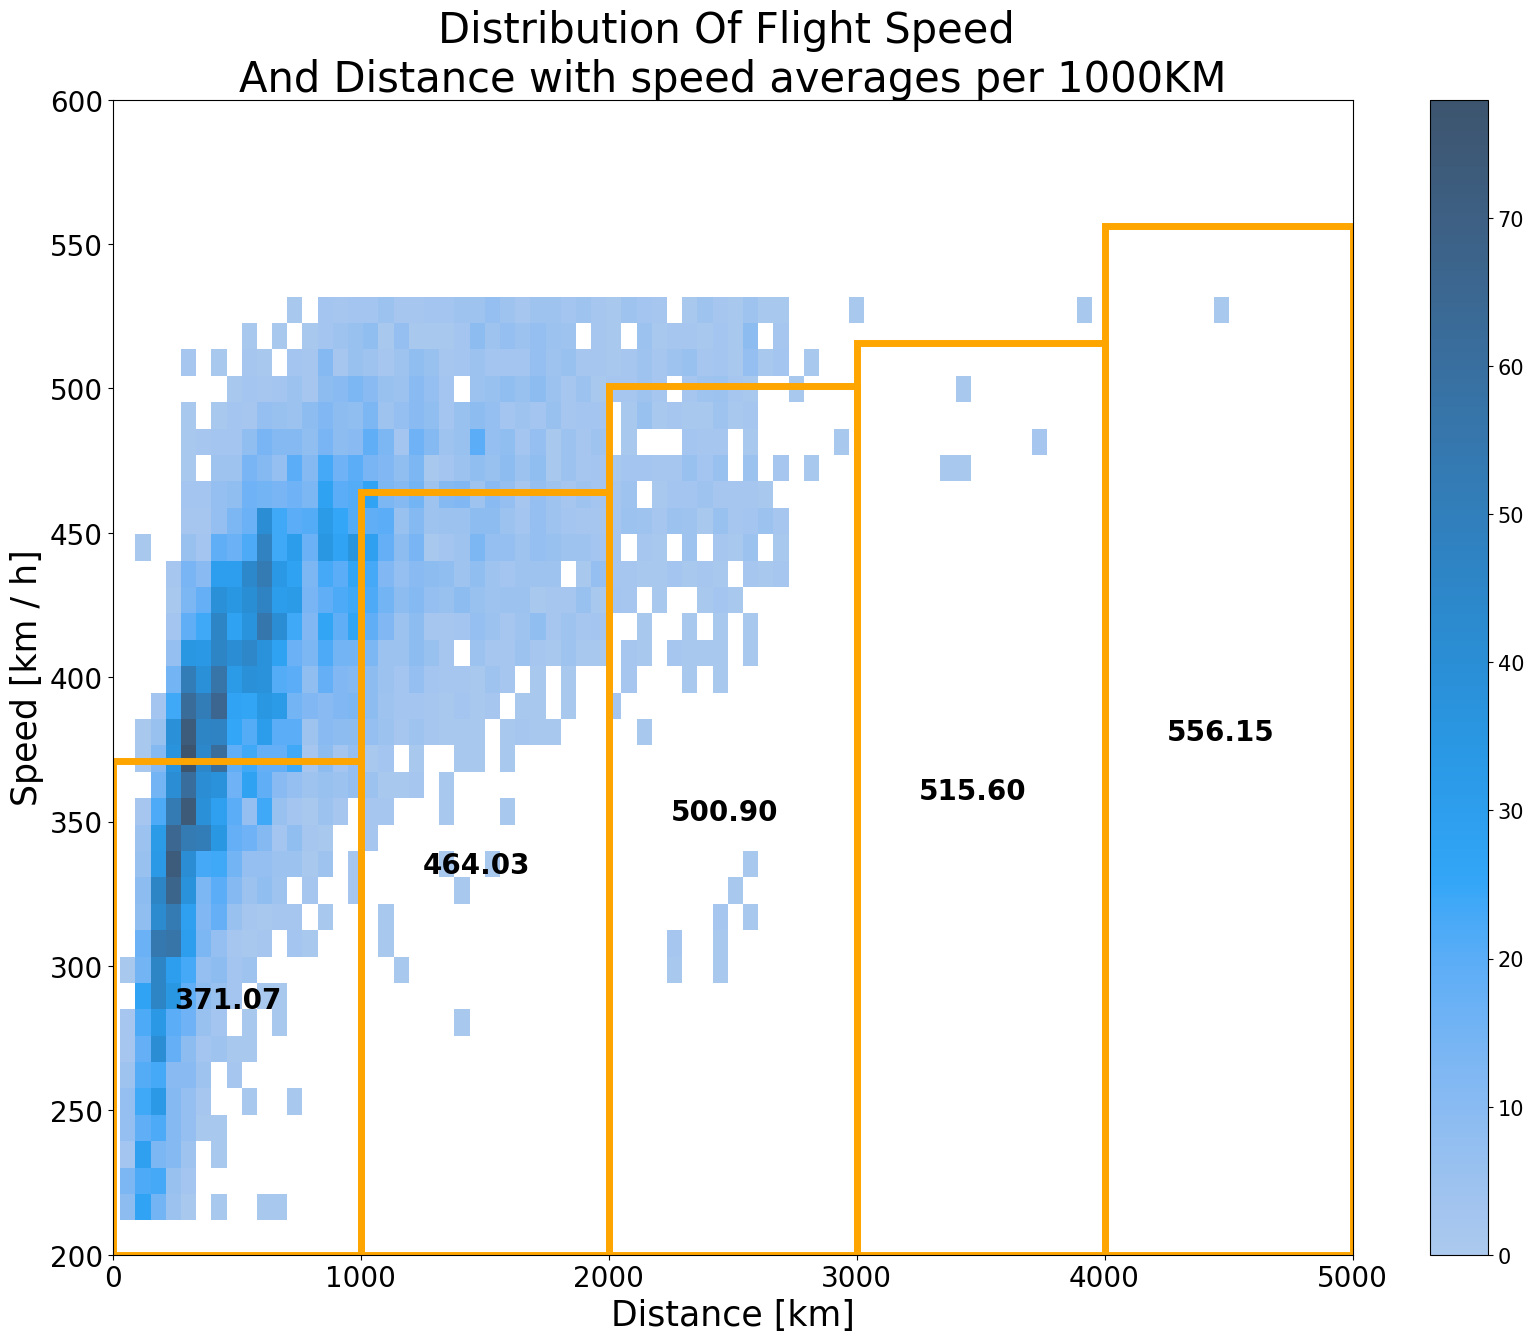

In [9]:
speed = pd.Series(df['Distance'] / df['AirTime'] * 60, 
                  name='speed', dtype='float64')
bins = np.arange(0, df.Distance.max() + 1000, 1000)
cat_distance=pd.cut(x=df.Distance, bins=bins)
temp = pd.concat([cat_distance, speed], axis=1)
speed_means = temp.groupby('Distance', as_index=False).mean()
fig, ax = plt.subplots(figsize=(20,15))
chart_data = pd.concat([df['Distance'], speed], axis=1)
chart_data = drop_outliers(data=chart_data, value_col='speed')
hist = sns.histplot(data=chart_data,x='Distance', y='speed', cbar=True, ax=ax)
ax.set_xlim(0)
ylim = floor(chart_data.speed.min() / 100) * 100
ymax = ceil(chart_data.speed.max() / 100) * 100
ax.set_ylim(ylim, ymax)
ax.set_xticks(bins)
ax.set_title('Distribution Of Flight Speed \n'
             'And Distance with speed averages per 1000KM', fontsize=30)
ax.set_xlabel('Distance [km]', fontsize=25)
ax.set_ylabel('Speed [km / h]', fontsize=25)
for i in range(len(speed_means)):
    interval = speed_means.loc[i, 'Distance']
    mean = speed_means.loc[i, 'speed']
    rec = patches.Rectangle(xy=(interval.left,ylim), 
                            width=interval.right - interval.left,
                            height=mean - ylim, fc='none', ec='orange', lw=5)
    ax.add_patch(rec)
    annot_x = rec.get_x() + rec.get_width() / 4
    annot_y = rec.get_y() + rec.get_height() / 2
    ax.text(x=annot_x, y=annot_y, s='{:.2f}'.format(mean), fontsize=20, fontweight='bold')
ax.tick_params(labelsize=20)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)


# Vis 2